In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import QuantileTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import lightgbm as lgb

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### **Importing the dataset and performing usual exploratory analysis steps like checking the structure & characteristics of the dataset.**

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Documents/DataScience/ola_driver_scaler.csv')
df = pd.DataFrame(df)

In [ ]:
df.head(5)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


Dropping irrelevant columns

In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
df.shape

(19104, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [ ]:
df.dtypes

,0
MMM-YY,object
Driver_ID,int64
Age,float64
Gender,float64
City,object
Education_Level,int64
Income,int64
Dateofjoining,object
LastWorkingDate,object
Joining Designation,int64


##### **Convert date-like features to their respective data type**

In [ ]:
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

<ipython-input-11-298fbf6d630d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
<ipython-input-11-298fbf6d630d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
<ipython-input-11-298fbf6d630d>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

Each driver is reporting the following details on the 1 st of every month.
1. Driver_ID
2. Age
3. Gender
4. City
5. Education_level
6. Income
7. Date of joining
8. Last working date
9. Joining designation
10. Grade
11. Total Business Value
12. Quarterly Rating

In [ ]:
df.describe()

,MMM-YY,Driver_ID,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104,1616,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,2019-12-11 02:09:29.849246464,1415.591133,34.668435,0.418749,1.021671,65652.025126,2018-04-28 20:52:54.874371840,2019-12-21 20:59:06.534653696,1.690536,2.252670,5.716621e+05,2.008899
min,2019-01-01 00:00:00,1.000000,21.000000,0.000000,0.000000,10747.000000,2013-04-01 00:00:00,2018-12-31 00:00:00,1.000000,1.000000,-6.000000e+06,1.000000
25%,2019-06-01 00:00:00,710.000000,30.000000,0.000000,0.000000,42383.000000,2016-11-29 12:00:00,2019-06-06 00:00:00,1.000000,1.000000,0.000000e+00,1.000000
50%,2019-12-01 00:00:00,1417.000000,34.000000,0.000000,1.000000,60087.000000,2018-09-12 00:00:00,2019-12-20 12:00:00,1.000000,2.000000,2.500000e+05,2.000000
75%,2020-07-01 00:00:00,2137.000000,39.000000,1.000000,2.000000,83969.000000,2019-11-05 00:00:00,2020-07-03 00:00:00,2.000000,3.000000,6.997000e+05,3.000000
max,2020-12-01 00:00:00,2788.000000,58.000000,1.000000,2.000000,188418.000000,2020-12-28 00:00:00,2020-12-28 00:00:00,5.000000,5.000000,3.374772e+07,4.000000
std,NaN,810.705321,6.257912,0.493367,0.800167,30914.515344,NaN,NaN,0.836984,1.026512,1.128312e+06,1.009832


##### Analyzing the total business value generated by each driver during every quarter.

In [ ]:
df['Quarter'] = df['MMM-YY'].dt.to_period('Q')

In [ ]:
Quarterly_total_Business_Value = df.groupby(by = ['Driver_ID', 'Quarter'])['Total Business Value'].sum().reset_index()
Quarterly_total_Business_Value.head()

,Driver_ID,Quarter,Total Business Value
0,1,2019Q1,1715580
1,2,2020Q4,0
2,4,2019Q4,0
3,4,2020Q1,350000
4,4,2020Q2,0


### Feature Engineering

**Negative Total Business value**(Negative TBV) indicates whether the driver generated negative business value for that month.

**Zero Total Business value**(Zero TBV) indicates whether the driver generated Zero business value for that month.

In [ ]:
df['Negative TBV'] = (df['Total Business Value'] < 0).astype('int')
df['Zero TBV'] = (df['Total Business Value'] == 0).astype('int')

In [ ]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating', 'Quarter',
       'Negative TBV', 'Zero TBV'],
      dtype='object')

In [ ]:
unique_drivers = df['Driver_ID'].unique()
unique_drivers.shape

(2381,)

The provided dataset contains 2381 drivers.

##### **Aggregating data in order to remove multiple occurrences of same driver data**

In [ ]:
df_grouped = df.groupby(by = ['Driver_ID']).agg({
    'MMM-YY' : 'first',
    'Age' : 'max',
    'Gender' : 'first',
    'City' : 'first',
    'Education_Level' : 'first',
    'Income' : 'last',
    'Dateofjoining' : 'first',
    'LastWorkingDate' : 'last',
    'Joining Designation' : 'first',
    'Grade' : 'last',
    'Total Business Value' : 'sum',
    'Quarterly Rating' : 'last',
    'Negative TBV' : 'sum',
    'Zero TBV' : 'sum'
}).reset_index()

In [ ]:
df_grouped.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Negative TBV,Zero TBV
0,1,2019-01-01,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,1715580,2,1,1
1,2,2020-11-01,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,2
2,4,2019-12-01,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,350000,1,0,4
3,5,2019-01-01,29.0,0.0,C9,0,46368,2019-01-09,2019-03-07,1,1,120360,1,0,2
4,6,2020-08-01,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,3,1265000,2,0,4


**Description of each column in df_grouped:**
1. Driver_ID: Unique ID assigned to each driver.
2. Age: Age of driver when the above dataset is under study.
3. Gender: Gender of the driver(0: Male, 1: Female)
4. City: City of the driver.
5. Education level: 0 for 10+ ,1 for 12+ ,2 for graduate
6. Income: The very recent month income of the driver.
7. Date of joining: The joining date of the driver.
8. Last working date: The last working date of the driver if he/she left the company. If they are still employed, it is NaT
9. Joining designation: The designation assigned by the company during their joining time.
10. Grade: The very recent grade of the driver.
11. Total Business value: The total business value generated by the driver during their tenure.
12. Quarterly rating: The very recent quarterly rating of the driver.
13. Negative TBV: The number of times the driver generated negative TBV during their tenure.
14. Zero TBV: The number of times the driver generated zero TBV during their tenure.

In [ ]:
df_grouped.isna().sum()

,0
Driver_ID,0
MMM-YY,0
Age,0
Gender,0
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,765
Joining Designation,0


In [ ]:
df_grouped['Negative TBV'].value_counts()

,count
Negative TBV,
0,2245
1,125
2,9
3,2


**Observations:**
1. Number of drivers who generated 0 times negative TBV during their tenure = 2245
2. Number of drivers who generated 1 time negative TBV during their tenure = 125
3. Number of drivers who generated 2 times negative TBV during their tenure = 9
4. Number of drivers who generated 3 times negative TBV during their tenure = 2

In [ ]:
df_grouped['Zero TBV'].value_counts()

,count
Zero TBV,
2,533
1,520
3,474
4,350
5,210
0,148
6,70
7,39
8,15


##### **Feature Engineering steps**
Deriving new columns from the existing columns in the derived dataset.

In [ ]:
df_grouped['Joining year'] = df_grouped['Dateofjoining'].dt.year
df_grouped['Joining year'].value_counts()

,count
Joining year,
2020,818
2018,599
2019,591
2015,109
2016,108
2017,86
2013,41
2014,29


Creating a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1

In [ ]:
def qrt_rat_inc(rating):
  # len(rating) >= 2 indicates that the driver employed for at least 2 quarters.
  isIncreased = 0
  if len(rating) >= 2:
    isIncreased = (rating.iloc[-1] > rating.iloc[-2]).astype('int')
  return isIncreased


In [ ]:
# Finding out the maximum rating of each employee in every quarter
Quarterly_rating = df.groupby(by = ['Driver_ID', 'Quarter'])['Quarterly Rating'].max().reset_index()
Quarterly_rating.rename(columns = {'Quarterly Rating' : 'Maximum Quarterly Rating'}, inplace = True)

In [ ]:
Quarterly_rating.head()

,Driver_ID,Quarter,Maximum Quarterly Rating
0,1,2019Q1,2
1,2,2020Q4,1
2,4,2019Q4,1
3,4,2020Q1,1
4,4,2020Q2,1


In [ ]:
Quarterly_rating_increased = Quarterly_rating.groupby(by = ['Driver_ID'])['Maximum Quarterly Rating'].apply(qrt_rat_inc).reset_index()
Quarterly_rating_increased.rename(columns = {'Maximum Quarterly Rating' : 'Quarterly Rating Increased'}, inplace = True)
Quarterly_rating_increased.head()

,Driver_ID,Quarterly Rating Increased
0,1,0
1,2,0
2,4,0
3,5,0
4,6,1


In [ ]:
# Merging Quarterly Rating Increased column with the existing table df_grouped.
df_grouped = pd.merge(left=df_grouped, right=Quarterly_rating_increased, on='Driver_ID', how='outer')

Creating a column which tells whether the quarterly rating has decreased for that driver - for those whose quarterly rating has decreased we assign the value 1

In [ ]:
def qrt_rat_dec(rating):
  # len(rating) >= 2 indicates that the driver employed for at least 2 quarters.
  if len(rating) >= 2:
    return (rating.iloc[-1] < rating.iloc[-2]).astype('int')
  else:
    return 0

In [ ]:
Quarterly_rating_decreased = Quarterly_rating.groupby(by = ['Driver_ID'])['Maximum Quarterly Rating'].apply(qrt_rat_dec).reset_index()
Quarterly_rating_decreased.rename(columns = {'Maximum Quarterly Rating' : 'Quarterly Rating Decreased'}, inplace = True)

In [ ]:
df_grouped = pd.merge(left=df_grouped, right=Quarterly_rating_decreased, on='Driver_ID', how='outer')
df_grouped['Quarterly Rating Decreased'].value_counts()

,count
Quarterly Rating Decreased,
0,1856
1,525


Creating a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1

In [ ]:
def income_inc(income):
  # len(income) >= 2 indicates that the driver employed for at least 2 months.
  if len(income) >= 2:
    # Checks whether the monthly has increased.
    return (income.diff() > 0).any().astype('int')
  else:
    return 0

In [ ]:
monthly_income_increased = df.groupby(by = ['Driver_ID'])['Income'].apply(income_inc).reset_index()
monthly_income_increased.rename(columns = {'Income' : 'Income Increased'}, inplace = True)
monthly_income_increased.head()

,Driver_ID,Income Increased
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0


In [ ]:
monthly_income_increased['Income Increased'].value_counts()

,count
Income Increased,
0,2337
1,44


In [ ]:
df_grouped = pd.merge(left=df_grouped, right=monthly_income_increased, on='Driver_ID', how='outer')

In [ ]:
# Calculate the count of drivers with increase in grade monthly.
def grade_inc(grade):
  if len(grade) >= 2:
    return (grade.diff() > 0).any().astype('int')
  else:
    return 0

In [ ]:
monthly_grade_increased = df.groupby(by = ['Driver_ID'])['Grade'].apply(grade_inc).reset_index()
monthly_grade_increased.rename(columns = {'Grade' : 'Grade Increased'}, inplace = True)
monthly_grade_increased.head()

,Driver_ID,Grade Increased
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0


In [ ]:
monthly_grade_increased['Grade Increased'].value_counts()

,count
Grade Increased,
0,2337
1,44


In [ ]:
monthly_grade_increased[monthly_grade_increased['Grade Increased'] == 1]['Driver_ID'].unique()

array([  26,   54,   60,   98,  275,  307,  320,  368,  434,  537,  568,
        580,  582,  638,  716,  789,  888, 1031, 1050, 1161, 1165, 1206,
       1249, 1274, 1316, 1327, 1770, 1783, 1817, 1840, 1852, 1877, 1918,
       2008, 2070, 2087, 2198, 2272, 2390, 2407, 2543, 2567, 2625, 2690])

In [ ]:
monthly_income_increased[monthly_income_increased['Income Increased'] == 1]['Driver_ID'].unique()

array([  26,   54,   60,   98,  275,  307,  320,  368,  434,  537,  568,
        580,  582,  638,  716,  789,  888, 1031, 1050, 1161, 1165, 1206,
       1249, 1274, 1316, 1327, 1770, 1783, 1817, 1840, 1852, 1877, 1918,
       2008, 2070, 2087, 2198, 2272, 2390, 2407, 2543, 2567, 2625, 2690])

#### Observations:
It's evident that as people move up in their grades, their monthly income sees a boost!. As there is very high correlation between Income Increased and Grade Increased columns, it is not necessary to merge both columns to the existing dataset.

##### **Target variable creation.**
There are two categories in Target variable.
1. Person who left the company, denoted by 1.
2. Person who is still with the company, denoted by 0.

In [ ]:
df_grouped['Target'] = (df_grouped['LastWorkingDate'].notna()).astype('int')

In [ ]:
# Calculate the ratio between total business value and income
df_grouped['TBV/Income'] = df_grouped['Total Business Value'] //df_grouped['Income']

##### **Statistical Summary of the derived data.**

In [ ]:
df_grouped.columns

Index(['Driver_ID', 'MMM-YY', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating', 'Negative TBV',
       'Zero TBV', 'Joining year', 'Quarterly Rating Increased',
       'Quarterly Rating Decreased', 'Income Increased', 'Target',
       'TBV/Income'],
      dtype='object')

In [ ]:
df_grouped.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,...,Total Business Value,Quarterly Rating,Negative TBV,Zero TBV,Joining year,Quarterly Rating Increased,Quarterly Rating Decreased,Income Increased,Target,TBV/Income
0,1,2019-01-01,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,...,1715580,2,1,1,2018,0,0,0,1,29
1,2,2020-11-01,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,...,0,1,0,2,2020,0,0,0,0,0
2,4,2019-12-01,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,...,350000,1,0,4,2019,0,0,0,1,5
3,5,2019-01-01,29.0,0.0,C9,0,46368,2019-01-09,2019-03-07,1,...,120360,1,0,2,2019,0,0,0,1,2
4,6,2020-08-01,31.0,1.0,C11,1,78728,2020-07-31,NaT,3,...,1265000,2,0,4,2020,1,0,0,0,16


In [ ]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Driver_ID                   2381 non-null   int64         
 1   MMM-YY                      2381 non-null   datetime64[ns]
 2   Age                         2381 non-null   float64       
 3   Gender                      2381 non-null   float64       
 4   City                        2381 non-null   object        
 5   Education_Level             2381 non-null   int64         
 6   Income                      2381 non-null   int64         
 7   Dateofjoining               2381 non-null   datetime64[ns]
 8   LastWorkingDate             1616 non-null   datetime64[ns]
 9   Joining Designation         2381 non-null   int64         
 10  Grade                       2381 non-null   int64         
 11  Total Business Value        2381 non-null   int64       

**Observations:**
LastWorkingDate column contains only 1616 non-null values that indicate 1616 drivers left the company.

In [ ]:
df_grouped.shape

(2381, 21)

In [ ]:
df_grouped.describe()

,Driver_ID,MMM-YY,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Negative TBV,Zero TBV,Joining year,Quarterly Rating Increased,Quarterly Rating Decreased,Income Increased,Target,TBV/Income
count,2381.000000,2381,2381.000000,2381.000000,2381.00000,2381.000000,2381,1616,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,2019-08-30 15:12:37.496849920,33.663167,0.410332,1.00756,59334.157077,2019-02-08 07:14:50.550189056,2019-12-21 20:59:06.534653440,1.820244,2.096598,4.586742e+06,1.427971,0.062579,2.729525,2018.536329,0.101638,0.220496,0.018480,0.678706,70.753885
min,1.000000,2019-01-01 00:00:00,21.000000,0.000000,0.00000,10747.000000,2013-04-01 00:00:00,2018-12-31 00:00:00,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,0.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,-27.000000
25%,695.000000,2019-01-01 00:00:00,29.000000,0.000000,0.00000,39104.000000,2018-06-29 00:00:00,2019-06-06 00:00:00,1.000000,1.000000,0.000000e+00,1.000000,0.000000,1.000000,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1400.000000,2019-07-01 00:00:00,33.000000,0.000000,1.00000,55315.000000,2019-07-21 00:00:00,2019-12-20 12:00:00,2.000000,2.000000,8.176800e+05,1.000000,0.000000,2.000000,2019.000000,0.000000,0.000000,0.000000,1.000000,15.000000
75%,2100.000000,2020-05-01 00:00:00,37.000000,1.000000,2.00000,75986.000000,2020-05-02 00:00:00,2020-07-03 00:00:00,2.000000,3.000000,4.173650e+06,2.000000,0.000000,4.000000,2020.000000,0.000000,0.000000,0.000000,1.000000,79.000000
max,2788.000000,2020-12-01 00:00:00,58.000000,1.000000,2.00000,188418.000000,2020-12-28 00:00:00,2020-12-28 00:00:00,5.000000,5.000000,9.533106e+07,4.000000,3.000000,15.000000,2020.000000,1.000000,1.000000,1.000000,1.000000,1058.000000
std,806.161628,NaN,5.983375,0.491997,0.81629,28383.666384,NaN,NaN,0.841433,0.941522,9.127115e+06,0.809839,0.267006,1.814717,1.609597,0.302235,0.414668,0.134706,0.467071,123.310621


##### **Univariate Analysis**

In [ ]:
df_grouped.columns

Index(['Driver_ID', 'MMM-YY', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating', 'Negative TBV',
       'Zero TBV', 'Joining year', 'Quarterly Rating Increased',
       'Quarterly Rating Decreased', 'Income Increased', 'Target',
       'TBV/Income'],
      dtype='object')

In [ ]:
# Segregating categorical and numerical columns.
categorical_cols = ['Gender', 'City', 'Education_Level', 'Joining Designation', 'Joining year', 'Grade', 'Quarterly Rating', 'Negative TBV', 'Zero TBV', 'Quarterly Rating Increased', 'Quarterly Rating Decreased', 'Income Increased', 'Target']
numerical_cols = ['Age', 'Income', 'Total Business Value', 'TBV/Income']

Univariate Analysis of Categorical columns

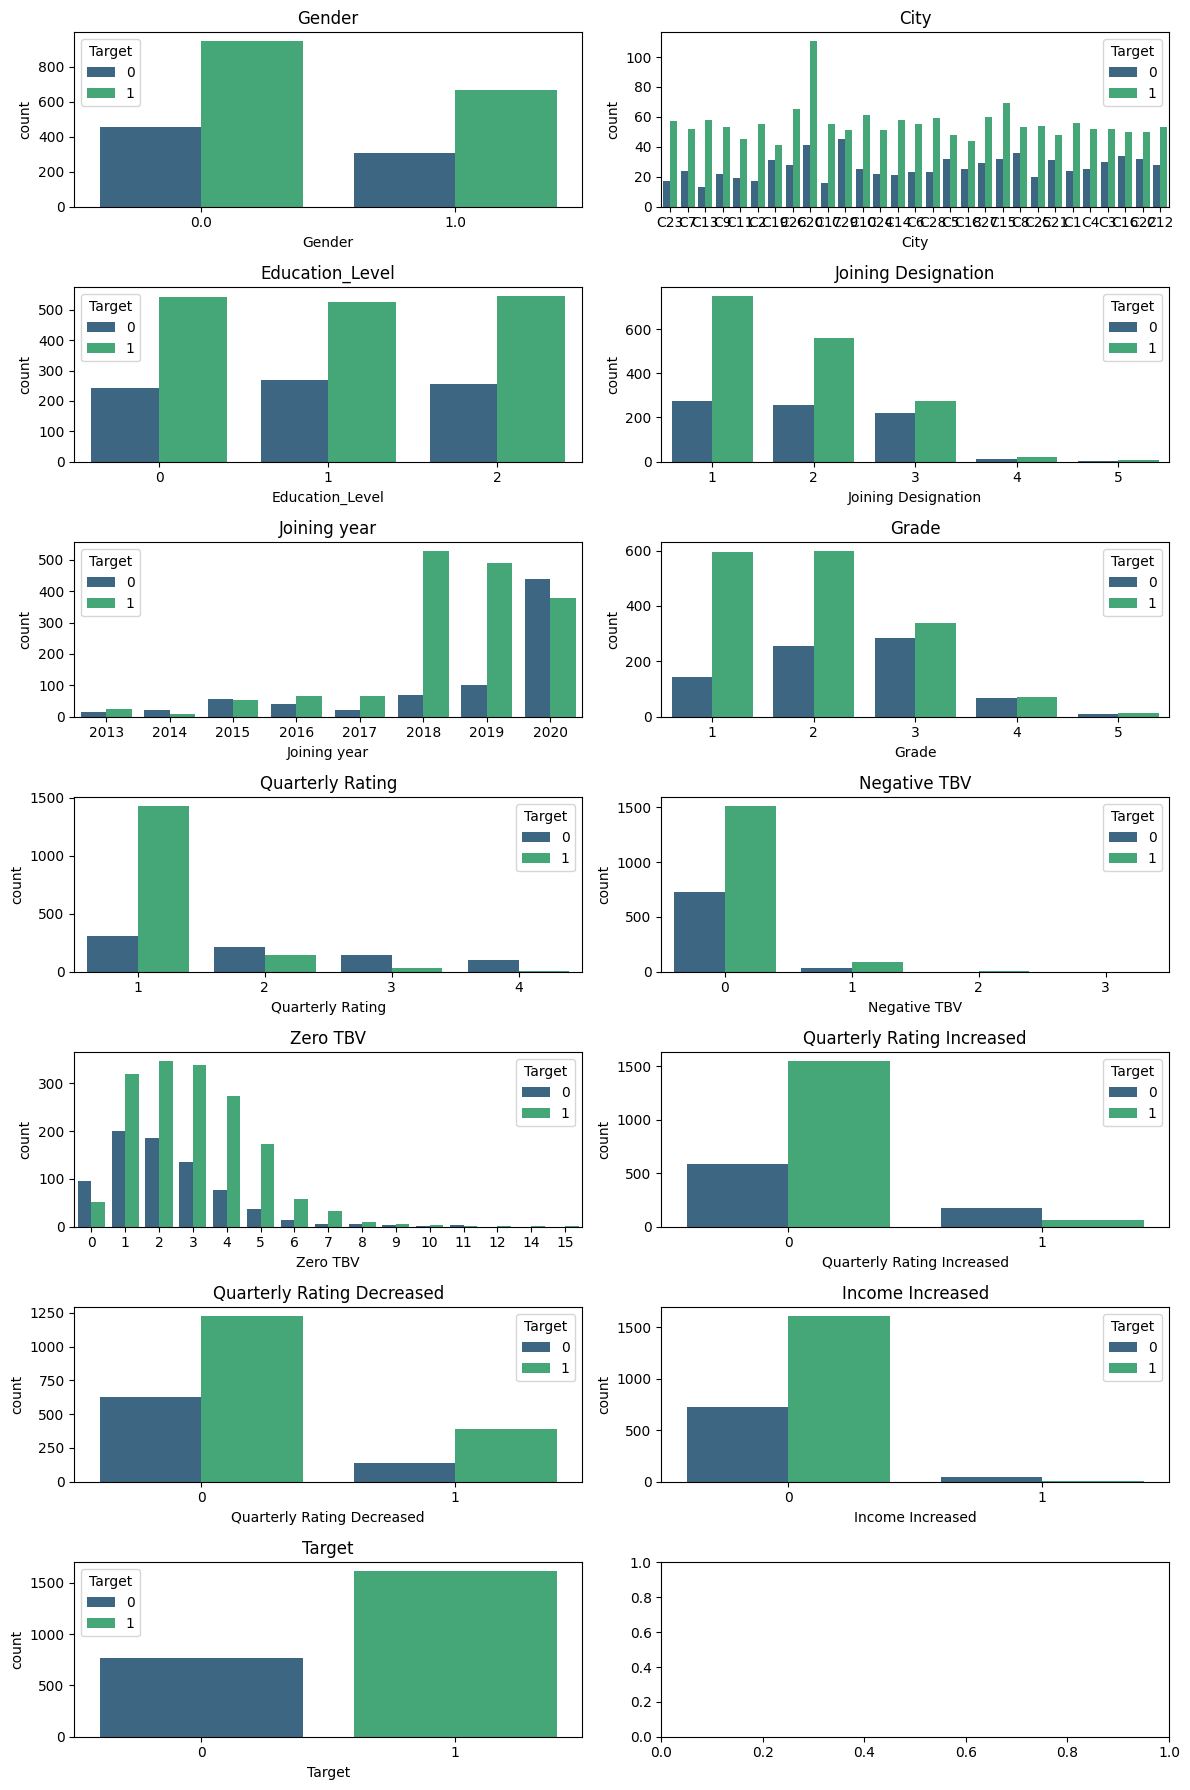

In [ ]:
# Count plots
num_cols = 2
num_rows = (len(categorical_cols) + 1)//2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 18))
axes = axes.flatten()
for index, col in enumerate(categorical_cols):
  sns.countplot(x = col, data = df_grouped, ax = axes[index], hue = 'Target', palette='viridis')
  axes[index].set_title(col)
plt.tight_layout()
plt.show()


#### Statistical tests

In [ ]:
# chi-squared tests
def chi2_test_for_categorical_features(df, target, categorical_features):
  for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df[target])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared statistic for {feature}: {chi2}")
    print(f"P-value for {feature}: {p_value}")
    print()


In [ ]:
chi2_test_for_categorical_features(df_grouped, 'Target', categorical_cols)

Chi-squared statistic for Gender: 0.15437366733160626
P-value for Gender: 0.6943902798506425

Chi-squared statistic for City: 46.91717618985934
P-value for City: 0.013977549937173567

Chi-squared statistic for Education_Level: 1.5252543618651058
P-value for Education_Level: 0.46643939521309963

Chi-squared statistic for Joining Designation: 49.14053860231594
P-value for Joining Designation: 5.457615375535053e-10

Chi-squared statistic for Joining year: 394.78620375258527
P-value for Joining year: 3.1298680078804462e-81

Chi-squared statistic for Grade: 130.60164814676116
P-value for Grade: 2.8955519930847994e-27

Chi-squared statistic for Quarterly Rating: 658.1193813387601
P-value for Quarterly Rating: 2.5289656594512383e-142

Chi-squared statistic for Negative TBV: 4.152287798770777
P-value for Negative TBV: 0.24548240529791807

Chi-squared statistic for Zero TBV: 139.66089597989952
P-value for Zero TBV: 8.286227885198204e-23

Chi-squared statistic for Quarterly Rating Increased: 205

##### **Observations:**
Setting the threshold at 0.01, we conclude that if the p-value is less than 0.01, there is no association between that feature and the target variable.

Based on the above statement, we can drop the following columns.

1. Gender
2. City
3. Education_Level
4. Negative_TBV

In [ ]:
df_grouped.drop(['Gender', 'City', 'Education_Level', 'Negative TBV'], axis = 1, inplace = True)

#### Univariate Analysis of Numerical columns

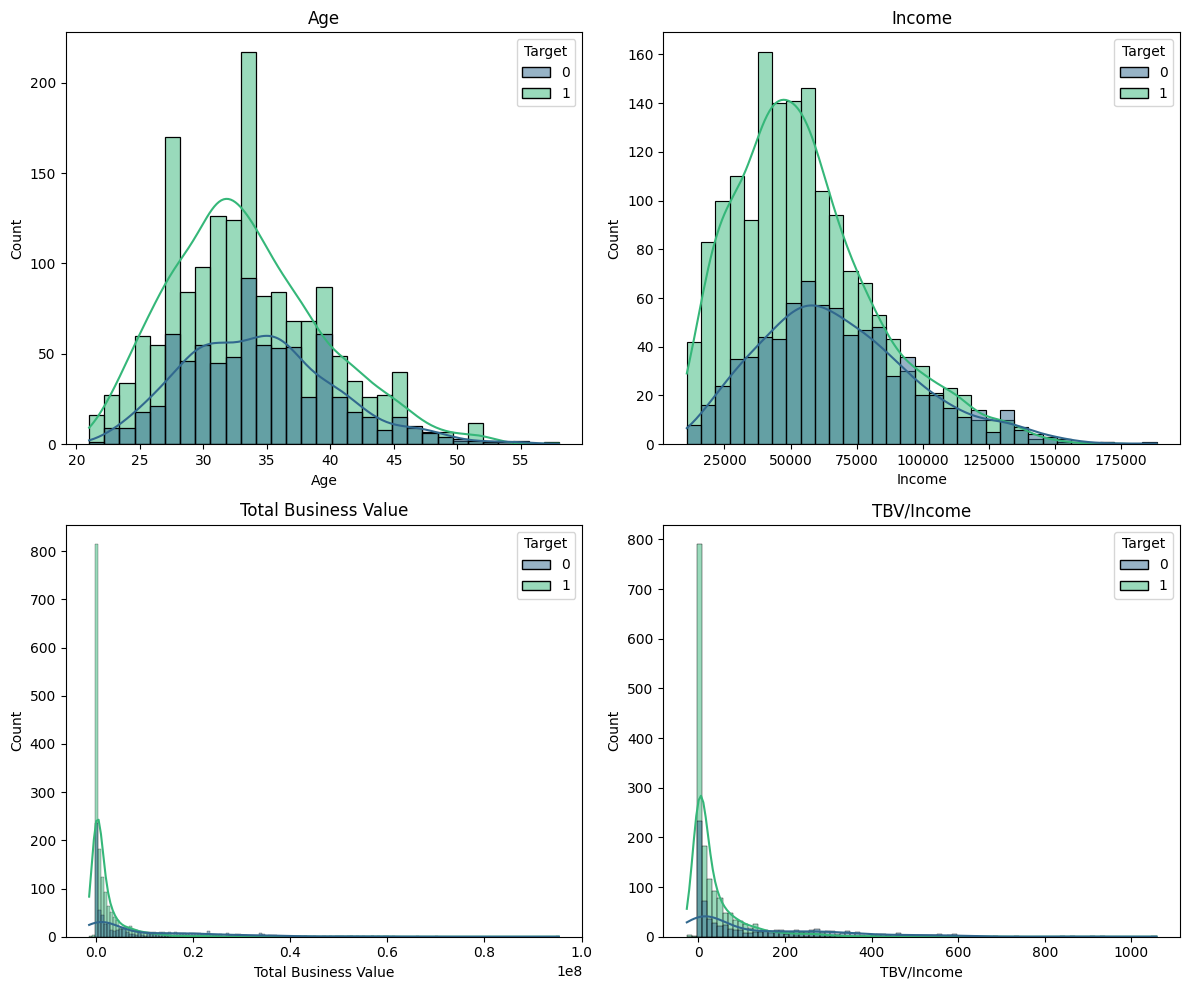

In [ ]:
# Histograms
num_cols = 2
num_rows = (len(numerical_cols) + 1)//2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))
axes = axes.flatten()
for index, col in enumerate(numerical_cols):
  sns.histplot(x = col, data = df_grouped, ax = axes[index], hue = 'Target', palette='viridis', kde = True)
  axes[index].set_title(col)
plt.tight_layout()
plt.show()

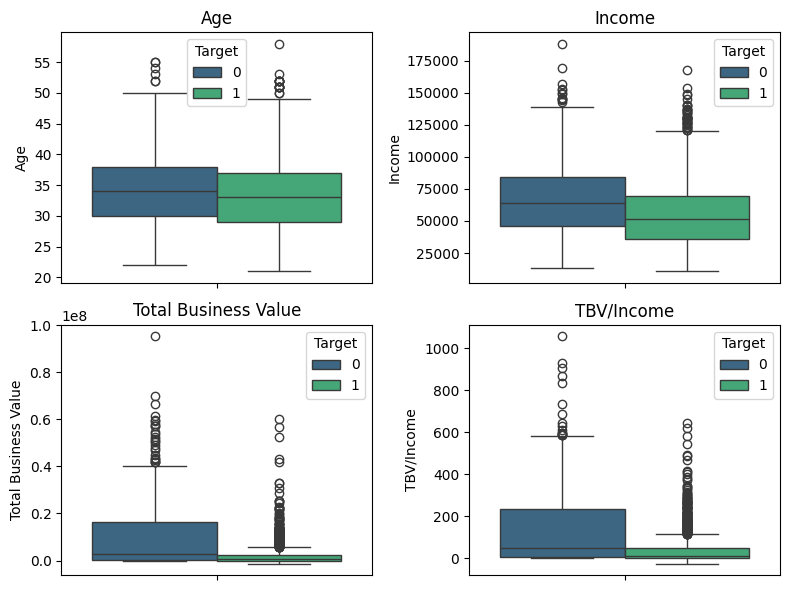

In [ ]:
# Outlier detection using boxplot.
num_cols = 2
num_rows = (len(numerical_cols) + 1)//2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 6))
axes = axes.flatten()
for index, col in enumerate(numerical_cols):
  sns.boxplot(y = col, data = df_grouped, ax = axes[index], hue = 'Target', palette='viridis', orient='vertical')
  axes[index].set_title(col)
plt.tight_layout()
plt.show()

##### **Observations**
The data contains a significant number of outliers, which can be handled using transformation techniques. Outliers are present in the upper whisker, so the data is right-skewed.

In [ ]:
# Checking the skewness of the data.
df_grouped[numerical_cols].skew()

,0
Age,0.539098
Income,0.779471
Total Business Value,3.361335
TBV/Income,2.708755


In [ ]:
# Applying quantile transformation to mitigate the skewness in the data.
qt = QuantileTransformer(output_distribution='normal', n_quantiles=500) # Applying quantile transformation to the numerical features to mitigate skewness
df_grouped[numerical_cols] = qt.fit_transform(df_grouped[numerical_cols])

In [ ]:
df_grouped[numerical_cols].skew()

,0
Age,-0.077790
Income,-0.012350
Total Business Value,0.346943
TBV/Income,0.342302


#### Statistical Analysis of Numerical features

##### Performing Mann-Whitney U test to analyse the association between each numerical feature and Target variable

In [ ]:
for feature in numerical_cols:
  print(f"Mann-Whitney U test for {feature}")
  group1 = df_grouped[df_grouped['Target'] == 1][feature]
  group0 = df_grouped[df_grouped['Target'] == 0][feature]
  statistic, p_value = mannwhitneyu(group1, group0)
  print(f"Statistic: {statistic}")
  print(f"P-value: {p_value}")


Mann-Whitney U test for Age
Statistic: 554242.5
P-value: 4.4408715565290214e-05
Mann-Whitney U test for Income
Statistic: 461998.0
P-value: 2.141977374254948e-23
Mann-Whitney U test for Total Business Value
Statistic: 397411.0
P-value: 2.625202102681489e-46
Mann-Whitney U test for TBV/Income
Statistic: 411532.0
P-value: 8.271171257277568e-41


**Observations**
After analyzing the histograms and statistical outputs, here are the main observations:

1. Drivers with high monthly incomes tend to remain with the company.
2. Most of the drivers generating substantial business value are also not leaving the company.
3. The second point is applicable to the TBV/income feature as well.
4. There are no significant findings related to the Age feature. Although the precision is low, we can suggest that younger drivers may be more prone to attrition.

##### **Class Imbalance treatment**

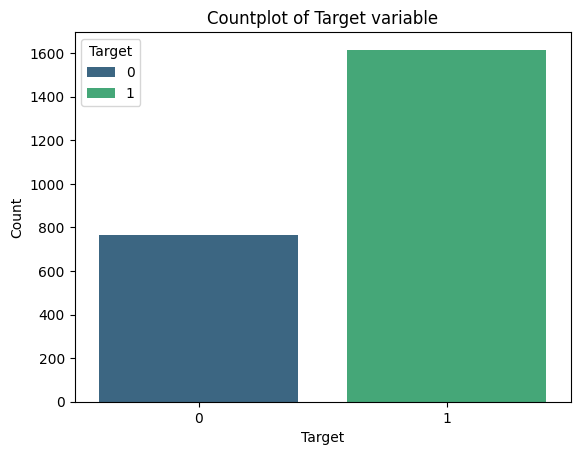

In [ ]:
sns.countplot(x = 'Target', data = df_grouped, palette='viridis', hue = 'Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Countplot of Target variable')
plt.show()

In [ ]:
df_grouped['Target'].value_counts(normalize = True)

,proportion
Target,
1,0.678706
0,0.321294


**Observations:**
67.8% of all the drivers left the company during the 2 years period.
Here the data is imbalanced.
This imbalance can lead to biased models that perform poorly on the minority class, which is often the class of interest.
As the data is imbalanced, using appropriate over_sampling or under_sampling technique is preferable.

In [ ]:
df_grouped.columns

Index(['Driver_ID', 'MMM-YY', 'Age', 'Income', 'Dateofjoining',
       'LastWorkingDate', 'Joining Designation', 'Grade',
       'Total Business Value', 'Quarterly Rating', 'Zero TBV', 'Joining year',
       'Quarterly Rating Increased', 'Quarterly Rating Decreased',
       'Income Increased', 'Target', 'TBV/Income'],
      dtype='object')

In [ ]:
df_grouped.drop(['Driver_ID', 'MMM-YY', 'Dateofjoining', 'LastWorkingDate'], axis = 1, inplace = True)

In [ ]:
df_grouped.columns

Index(['Age', 'Income', 'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'Zero TBV', 'Joining year',
       'Quarterly Rating Increased', 'Quarterly Rating Decreased',
       'Income Increased', 'Target', 'TBV/Income'],
      dtype='object')

In [ ]:
# Separating features and target Variables.
X = df_grouped.drop('Target', axis = 1)
y = df_grouped['Target']

In [ ]:
# Splitting data into train and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#smote = SMOTE()
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **Model implementation**

**Decision tree classifier**

In [ ]:
tree = DecisionTreeClassifier(random_state=7)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [ ]:
accuracy_score(y_train, tree.predict(X_train))

1.0

In [ ]:
accuracy_score(y_test, y_pred)

0.8301886792452831

Hyperparameter tuning

In [ ]:
train_scores = []
test_scores = []
for i in range(1, 10):
  tree = DecisionTreeClassifier(max_depth = i, random_state=7)
  tree.fit(X_train, y_train)
  train_scores.append(tree.score(X_train, y_train))
  test_scores.append(tree.score(X_test, y_test))

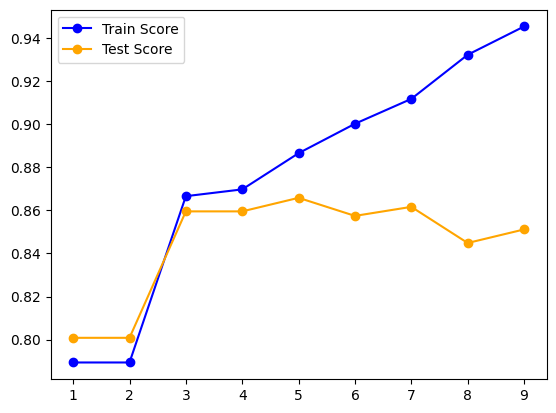

In [ ]:
plt.plot(range(1, 10), train_scores, label = 'Train Score', color = 'blue', marker = 'o')
plt.plot(range(1, 10), test_scores, label = 'Test Score', color = 'orange', marker = 'o')
plt.legend()
plt.show()

In [ ]:
# Training with the best parameters
tree_clf = DecisionTreeClassifier(max_depth = 4, random_state=7)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=7)

In [ ]:
y_test_pred = tree_clf.predict(X_test)
y_train_pred = tree_clf.predict(X_train)

In [ ]:
accuracy_score(y_train, y_train_pred)

0.8697478991596639

In [ ]:
accuracy_score(y_test, y_test_pred)

0.859538784067086

Classification report

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       150
           1       0.90      0.90      0.90       327

    accuracy                           0.86       477
   macro avg       0.84      0.84      0.84       477
weighted avg       0.86      0.86      0.86       477



Confusion matrix

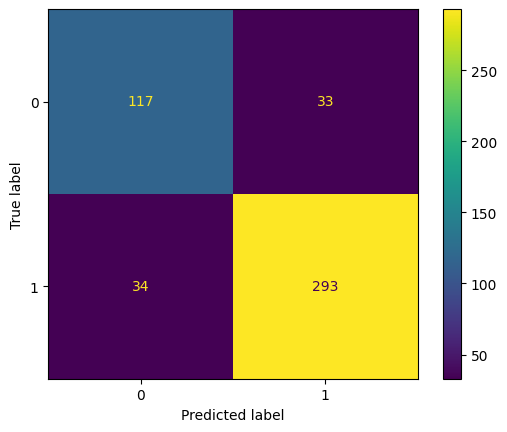

In [ ]:
ConfusionMatrixDisplay.from_estimator(tree_clf, X_test, y_test)

ROC AUC Curve

In [ ]:
roc_auc = roc_auc_score(y_test, y_test_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

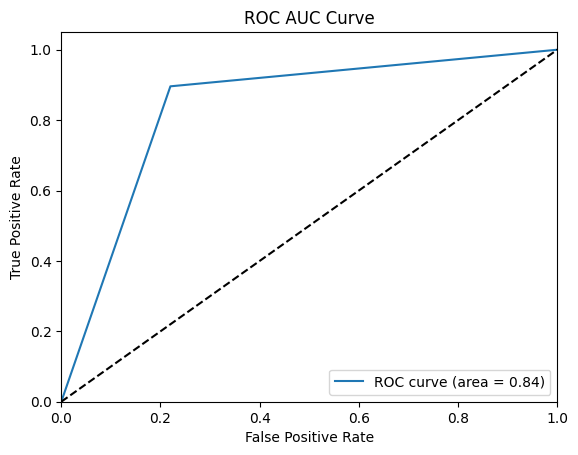

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

Feature importance

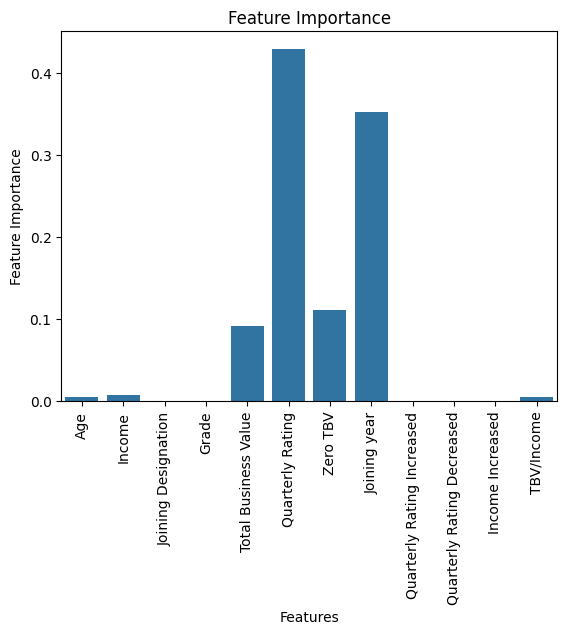

In [ ]:
sns.barplot(x = X.columns, y = tree_clf.feature_importances_)
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

##### **Random Forest Classifier**

In [ ]:
random_forest = RandomForestClassifier(random_state=7)
random_forest.fit(X_train, y_train)
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [ ]:
accuracy_score(y_train, y_train_pred)

1.0

In [ ]:
accuracy_score(y_test, y_test_pred)

0.8637316561844863

Hyperparameter tuning

In [ ]:
params = {
          'n_estimators' : [110, 120, 130],
          'max_depth' : [3, 4, 5, 7],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True],
          'max_features' : [8]
         }

In [ ]:
grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )
grid.fit(X_train, y_train)
print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 8, 'n_estimators': 130}
Best score:  0.8687059622279077


In [ ]:
random_forest = RandomForestClassifier(n_estimators = 110,
                                      max_depth = 5,
                                      criterion = 'entropy',
                                      bootstrap = True,
                                      max_features = 8,
                                      random_state=7)
random_forest.fit(X_train, y_train)
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)


In [ ]:
accuracy_score(y_train, y_train_pred)

0.8870798319327731

In [ ]:
accuracy_score(y_test, y_test_pred)

0.8721174004192872

Classification report

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78       150
           1       0.88      0.95      0.91       327

    accuracy                           0.87       477
   macro avg       0.87      0.83      0.84       477
weighted avg       0.87      0.87      0.87       477



Confusion matrix

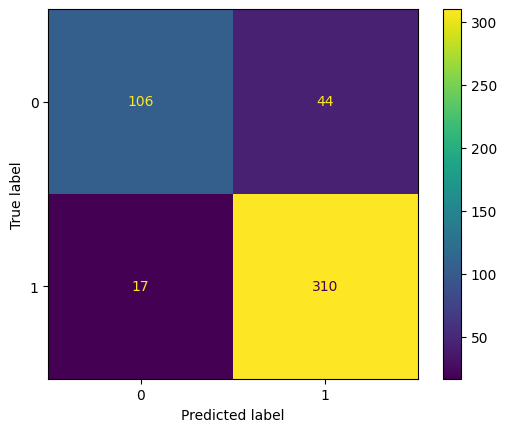

In [ ]:
ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test)

ROC AUC Curve

In [ ]:
roc_auc = roc_auc_score(y_test, y_test_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

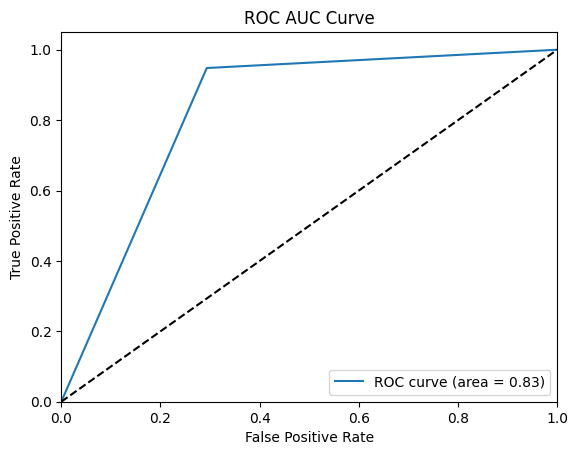

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

Feature Importance

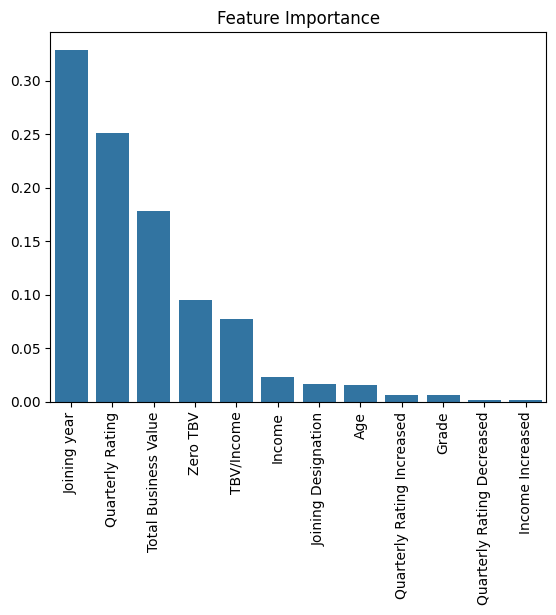

In [ ]:
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]
plt.title("Feature Importance")
sns.barplot(x=names, y=importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show() # Show plot

**Gradient Boosting Decision Trees**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gradient_boosting = GradientBoostingClassifier(random_state=7)
gradient_boosting.fit(X_train, y_train)
y_train_pred = gradient_boosting.predict(X_train)
y_test_pred = gradient_boosting.predict(X_test)

In [ ]:
accuracy_score(y_train, y_train_pred)

0.9159663865546218

In [ ]:
accuracy_score(y_test, y_test_pred)

0.8784067085953878

In [ ]:
gradient_boost = GradientBoostingClassifier(n_estimators = 100,
                                      max_depth = 3,
                                      criterion = 'friedman_mse',
                                      learning_rate = 0.05,
                                      random_state=7)
gradient_boost.fit(X_train, y_train)
y_train_pred = gradient_boost.predict(X_train)
y_test_pred = gradient_boost.predict(X_test)

In [ ]:
accuracy_score(y_train, y_train_pred)

0.8965336134453782

In [ ]:
accuracy_score(y_test, y_test_pred)

0.8721174004192872

Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78       150
           1       0.88      0.94      0.91       327

    accuracy                           0.87       477
   macro avg       0.87      0.83      0.84       477
weighted avg       0.87      0.87      0.87       477



Confusion matrix

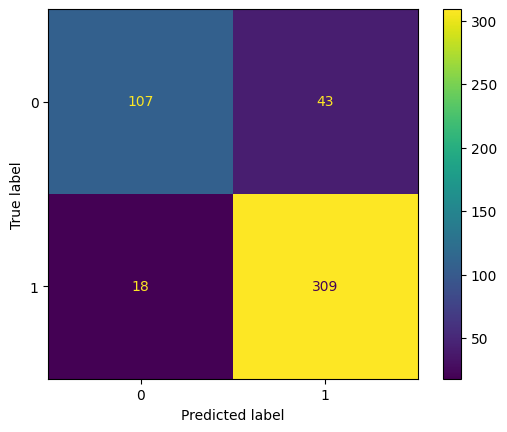

In [ ]:
ConfusionMatrixDisplay.from_estimator(gradient_boost, X_test, y_test)

ROC AUC Curve

In [ ]:
roc_auc = roc_auc_score(y_test, y_test_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

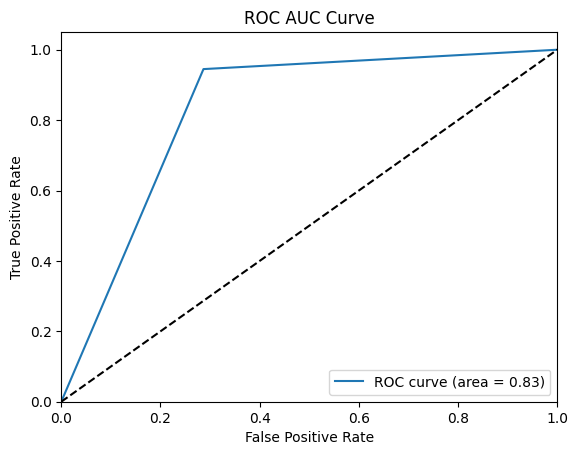

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

Feature Importance

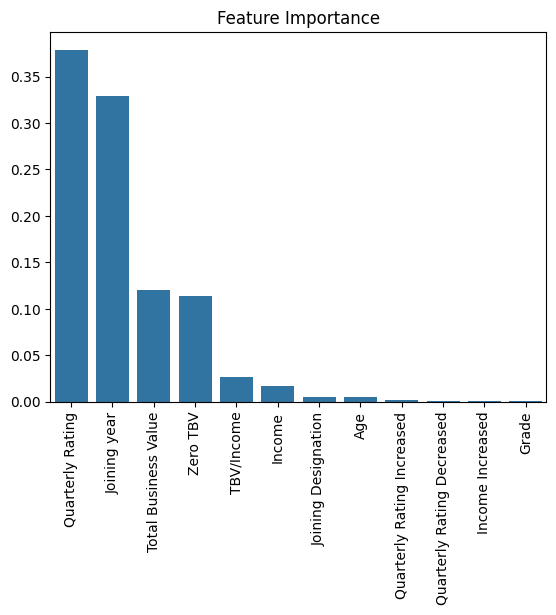

In [ ]:
importances = gradient_boost.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]
plt.title("Feature Importance")
sns.barplot(x=names, y=importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

**XGBoost**

In [ ]:
xgb = XGBClassifier(random_state=7, objective='binary:logistic')
xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

In [ ]:
accuracy_score(y_train, y_train_pred)

0.9936974789915967

In [ ]:
accuracy_score(y_test, y_test_pred)

0.8532494758909853

Hyperparameter tuning

In [ ]:
params = {
        "n_estimators": [50,100,150,200],
        "max_depth" : [3, 4, 5, 7],
        "learning_rate": [0.1, 0.2, 0.3],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        }

In [ ]:
grid = GridSearchCV(estimator = XGBClassifier(random_state=7, objective='binary:logistic'),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )

In [ ]:
grid.fit(X_train, y_train)
print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best score:  0.8718522566382672


In [ ]:
xgboost = XGBClassifier(random_state=7, learning_rate = 0.1, max_depth = 3, n_estimators = 50, objective='binary:logistic', subsample = 0.8, colsample_bytree = 1.0)
xgboost.fit(X_train, y_train)
y_train_pred = xgboost.predict(X_train)
y_test_pred = xgboost.predict(X_test)

In [ ]:
accuracy_score(y_train, y_train_pred)

0.8891806722689075

In [ ]:
accuracy_score(y_test, y_test_pred)

0.8742138364779874

Classification Report

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       150
           1       0.90      0.92      0.91       327

    accuracy                           0.87       477
   macro avg       0.86      0.85      0.85       477
weighted avg       0.87      0.87      0.87       477



Confusion matrix

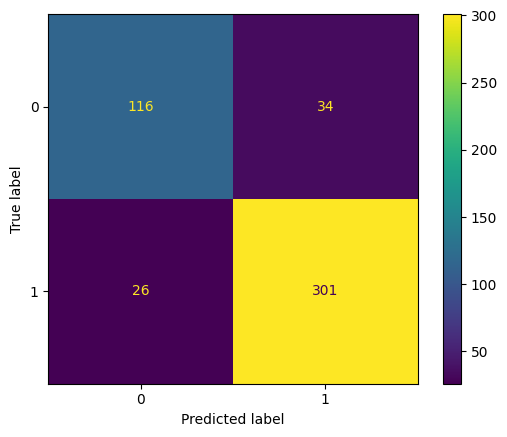

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgboost, X_test, y_test)

ROC-AUC Curve

In [ ]:
roc_auc = roc_auc_score(y_test, y_test_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

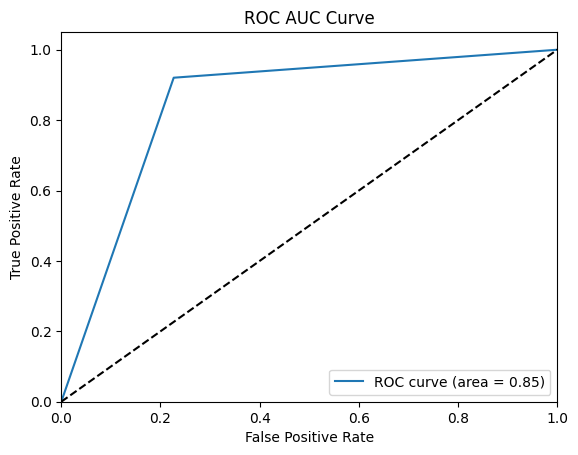

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

Feature Importance

Feature Importances: [0.02024488 0.02101959 0.03683746 0.0108861  0.08912484 0.45853952
 0.07745307 0.2136408  0.01566529 0.01321363 0.         0.04337494]


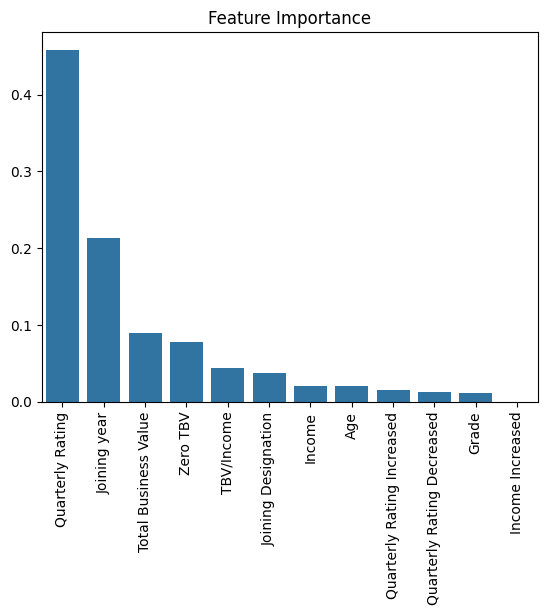

In [ ]:
importances = xgboost.feature_importances_
print(f'Feature Importances: {importances}')
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]
plt.title("Feature Importance")
sns.barplot(x=names, y=importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

**LightGBM**

In [ ]:
light_gbm = lgb.LGBMClassifier(random_state=7)
light_gbm.fit(X_train, y_train)
y_train_pred = light_gbm.predict(X_train)
y_test_pred = light_gbm.predict(X_test)

[LightGBM] [Info] Number of positive: 1289, number of negative: 615
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 1904, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.676996 -> initscore=0.740000
[LightGBM] [Info] Start training from score 0.740000


In [ ]:
accuracy_score(y_train, y_train_pred)

0.9873949579831933

In [ ]:
accuracy_score(y_test, y_test_pred)

0.8490566037735849

In [ ]:
params = {
        "n_estimators": [40,50, 60],
        "max_depth" : [3, 4, 5, 7],
        'learning_rate': [0.1, 0.2, 0.3],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
}

In [ ]:
grid = GridSearchCV(estimator = lgb.LGBMClassifier(random_state=7),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )
grid.fit(X_train, y_train)
print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

[LightGBM] [Info] Number of positive: 1289, number of negative: 615
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 1904, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.676996 -> initscore=0.740000
[LightGBM] [Info] Start training from score 0.740000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [ ]:
light_gbm = lgb.LGBMClassifier(random_state=7, learning_rate = 0.1, max_depth = 3, n_estimators = 60, subsample = 0.6, colsample_bytree = 1.0, importance_type = 'gain')

In [ ]:
light_gbm.fit(X_train, y_train)
y_train_pred = light_gbm.predict(X_train)
y_test_pred = light_gbm.predict(X_test)

[LightGBM] [Info] Number of positive: 1289, number of negative: 615
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 845
[LightGBM] [Info] Number of data points in the train set: 1904, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.676996 -> initscore=0.740000
[LightGBM] [Info] Start training from score 0.740000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [ ]:
accuracy_score(y_train, y_train_pred)

0.8949579831932774

In [ ]:
accuracy_score(y_test, y_test_pred)

0.8721174004192872

Classification report

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       150
           1       0.89      0.93      0.91       327

    accuracy                           0.87       477
   macro avg       0.86      0.84      0.85       477
weighted avg       0.87      0.87      0.87       477



Confusion matrix

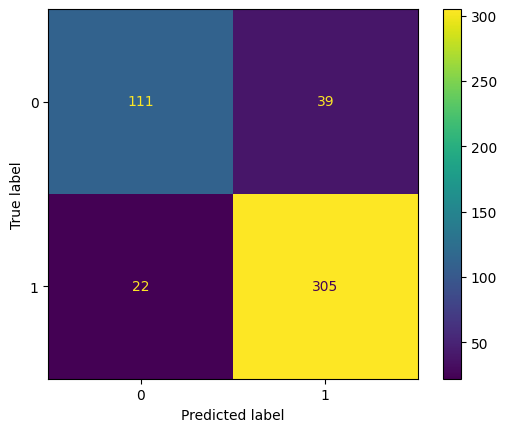

In [ ]:
ConfusionMatrixDisplay.from_estimator(light_gbm, X_test, y_test)

ROC-AUC Curve

In [ ]:
roc_auc = roc_auc_score(y_test, y_test_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

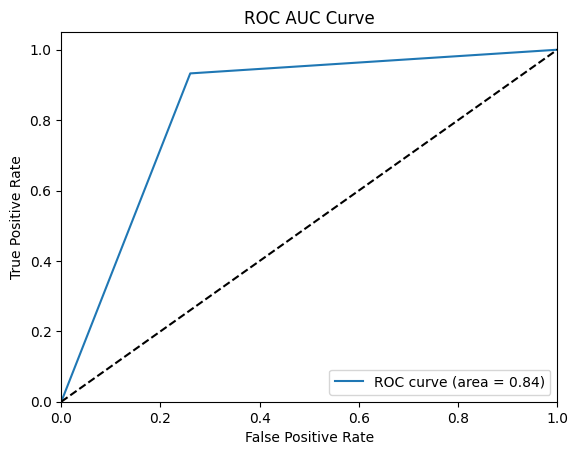

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

Feature Importance

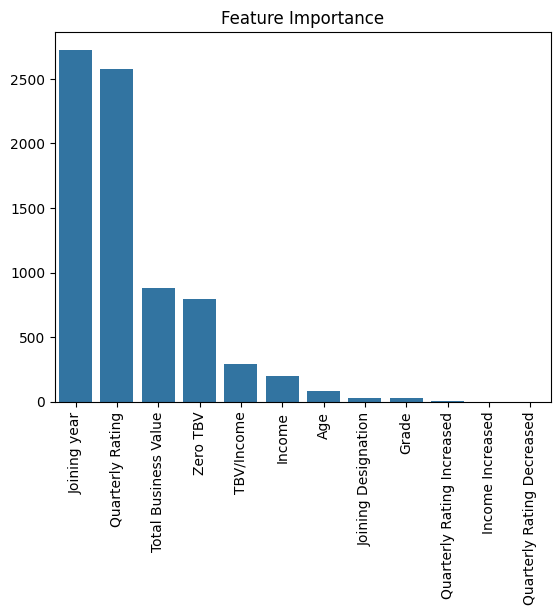

In [ ]:
importances = light_gbm.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]
plt.title("Feature Importance")
sns.barplot(x=names, y=importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

#### **Actionable insights and Recommendations**

The table shows the performance of different models
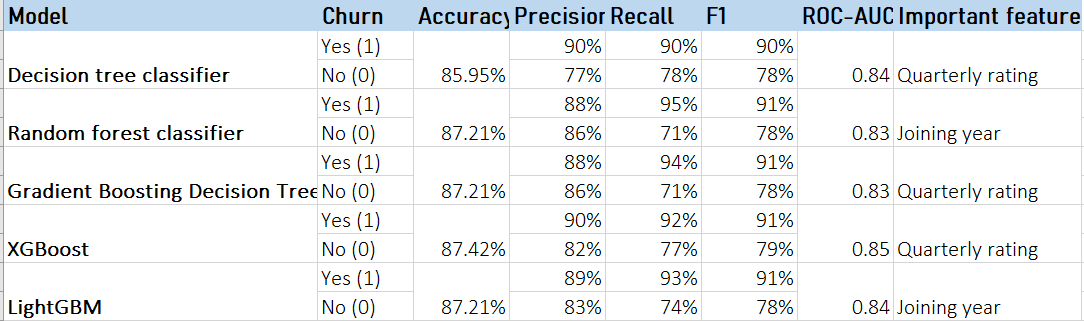

1. All models—Decision Tree, Random Forest, Gradient Boosting, XGBoost, and LightGBM—are performing well, but XGBoost is yielding the best results overall.  
2. The XGBoost model is able to identify 92% of the drivers who left the company, while the Random Forest classifier captures 95% of those drivers. Therefore, there is a tradeoff between the two models when choosing between precision and tradeoff.
3. Quarterly Rating and Joining year are the most important factors in determining the driver churn.
4. Accuracy is gradually increased from 85.95% to 87.42% from model to model.
5. Least importance to the features like Income increased, grade, income increased, and Quarterly rating decreased.
6. Ensemble models are yielding better F1 Score than simple decision tree classifier.
7. Here the dataset is not too big, it is preferable to choose RandomForestClassifier over XGBoost and LightGBM as there is no significant difference in the performance.

**Churn prediction metrics based on the above table**

1. Precision: The precision measures the proportion of correctly predicted churn cases among all predicted churn cases. It ranges from 88% to 90% indicating the ability of models in avoiding false positives.
2. Recall: The recall measures the proportion of correctly predicted churn cases among all actual churn cases. It ranges from 90% to 95% indicating the ability of models in identifying actual churn cases.
3. Accuracy: The accuracy measures the proportion of correctly classified samples among all the samples. It ranges from 85.95% to 87.42% that indicates the models' ability in classifying the data points correctly.
4. F1 Score: F1 score is the harmonic mean of Precision and Recall providing a balance between the two metrics. It ranges from 90% to 91% in the case of Churn.
5. ROC AUC Score: Area under the receiver operating characteristic curve measures the ability of the model in distinguishing between churn and non-churn cases. It ranges from 0.83 to 0.85.

#### **Recommendations**
1. As Joining year and quarterly rating are the important factors in deciding the driver churn, let us analyze top 3 factors and provide recommendations.

**Joining year(0.21)**: There is a high chance that long-time employees (drivers) may leave the company. Analyze the tenure of employees who left and come to the conclusion. If our assumption is true, providing extra-privileges to the long-time employees as a mark to their loyalty.

**Quarterly Rating(0.45):**  Consider increasing the quarterly rating of consistently high-performing drivers to reflect their contributions and value to the company.

**Total Business Value(0.08):** This indicates that the overall contribution of a driver to the company's business is a key factor in their decision to stay or leave. Acknowledge and appreciate drivers who generate significant business value.
